In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('monthly champagne.csv')

In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.drop(106,axis=0,inplace=True)

In [5]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [7]:
df.columns=['Month','Sales per month' ]

In [8]:
df.head()

,Month,Sales per month
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.head()

,Month,Sales per month
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Sales per month
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


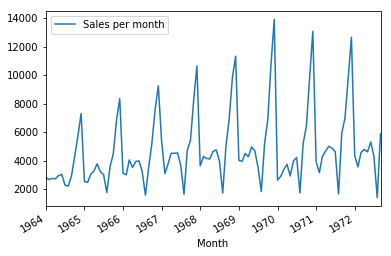

In [13]:
df.plot()

In [14]:
model=sm.tsa.statespace.SARIMAX(df['Sales per month'],order=(1, 0, 0),seasonal_order=(1,1,1,12))

results=model.fit()

C:\Users\zeesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


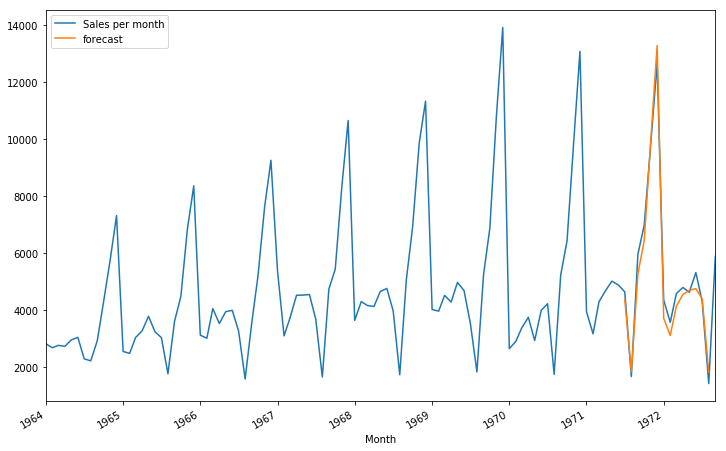

In [15]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)

df[['Sales per month','forecast']].plot(figsize=(12,8))

In [19]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [20]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [21]:
future_datest_df

,Sales per month,forecast
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN
NaT,NaN,NaN


In [22]:
future_df=pd.concat([df,future_datest_df])

C:\Users\zeesh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


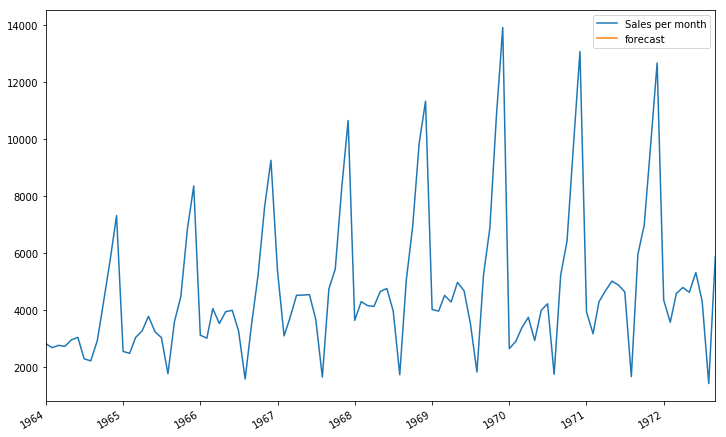

In [23]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  

future_df[['Sales per month', 'forecast']].plot(figsize=(12, 8)) 